In [2]:
%pylab nbagg
import tigre

import glob

Populating the interactive namespace from numpy and matplotlib


In [1]:
#!rename -e 's/\d+/sprintf("%04d",$&)/e' -- ../batch_submission_W/analysis/*.phsp.npy

In [3]:
files = sorted(glob.glob('../batch_submission_W/analysis/*.npy'))

dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512)
factor = (152/(np.sqrt(dist**2 + 152**2)))**3

flood_summed2 = factor*660 #np.mean(flood[250:260])

projs = []
images = []

for file in files:
    
    projs.append(np.load(file))
    images.append(-np.log(projs[-1]/flood_summed2))

In [4]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('Geometry Viewer')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2
        
        ss = rows*8/512

        self.im = ax.imshow(self.X[:, :, self.ind],cmap='bone',aspect='equal',extent=[-ss,ss,-ss,ss])
        self.update()

    def onscroll(self, event):
        #print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [14]:
image_av = np.tile(np.mean(np.flip(np.array(images)[:,:,:],0),1),[128,1,1]).transpose([1,0,2])

<IPython.core.display.Javascript object>


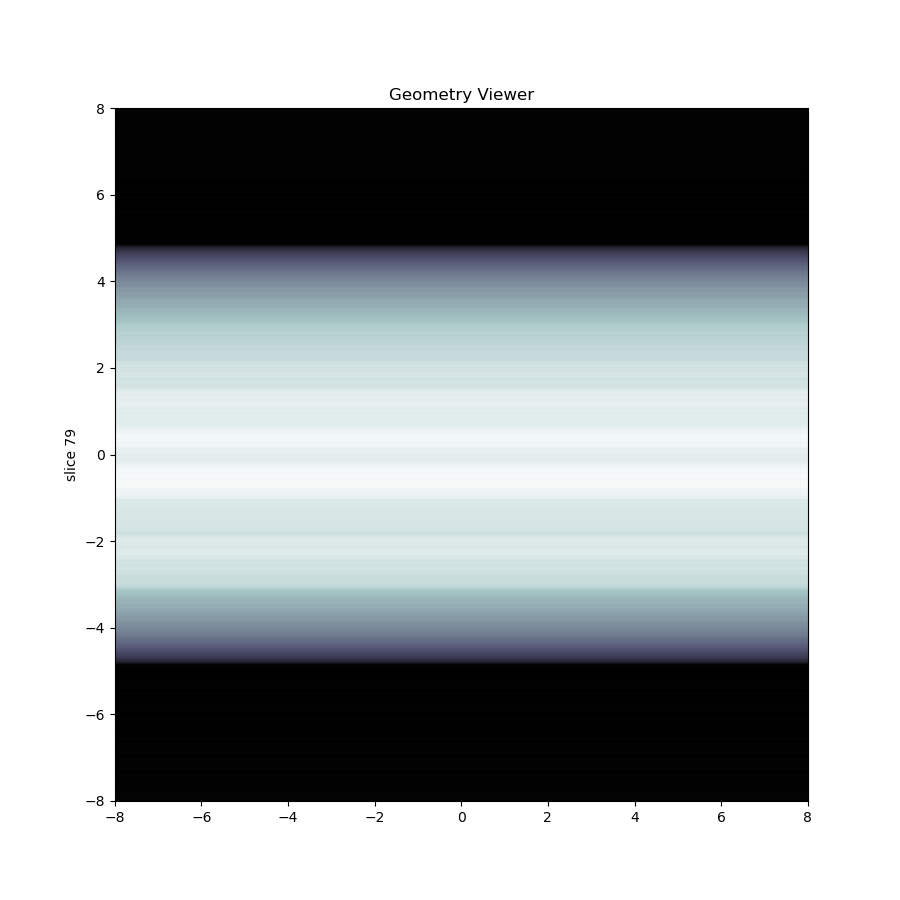

9

In [15]:
fig = plt.figure(figsize=[9,9])

ax1 = fig.add_subplot(111)

pad = 10

tracker1 = IndexTracker(ax1, np.array(image_av).T)

fig.canvas.mpl_connect('scroll_event', tracker1.onscroll)

In [17]:
geomet = tigre.geometry_default(high_quality=True,nVoxel = [64,512,512])
geomet.nDetector = np.array([128,512])
geomet.dDetector = np.array([0.784, 0.784])
geomet.DSD = 1520

# I think I can get away with this
geomet.sDetector = geomet.dDetector * geomet.nDetector    

geomet.sVoxel = np.array((160, 160, 160)) 
geomet.dVoxel = geomet.sVoxel/geomet.nVoxel 
angles = np.linspace(0,360,180,endpoint=False)*np.pi/180

In [27]:
im2 = tigre.algorithms.FDK(image_av,geomet,angles)

<IPython.core.display.Javascript object>


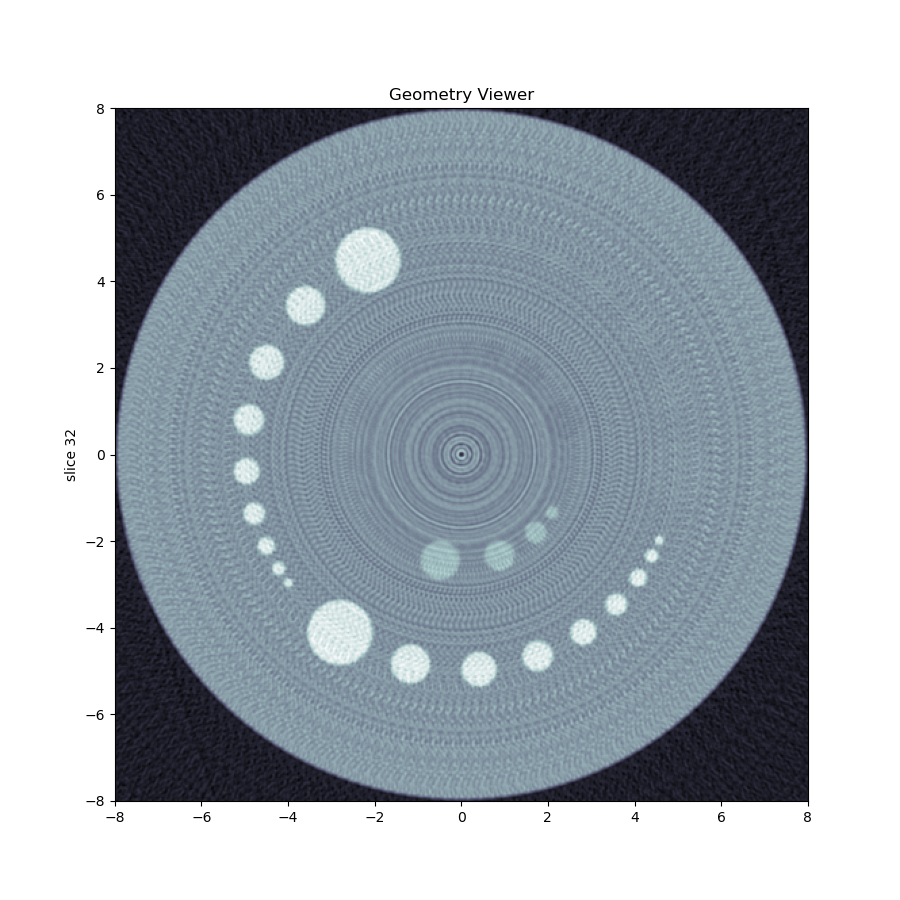

9

In [28]:
fig = plt.figure(figsize=[9,9])

ax1 = fig.add_subplot(111)

pad = 10

tracker1 = IndexTracker(ax1, im2.T)

fig.canvas.mpl_connect('scroll_event', tracker1.onscroll)

In [29]:
np.save('recon_new_npys',im2.T)